In [8]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [177]:
#CRIAÇÃO DA DATASET FICTICIO

import csv 
import random
from faker import Faker
from datetime import datetime, timedelta

num_rows = 261
fieldnames = ['ID Produto', 'Valor Total', 'Quantidade', 'Data', 'Dia da Semana','Cliente', 'Email']
filename = 'dados_vendas.csv'

with open(filename, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
                            
    # Criação dos dados fictícios
    # Serão criados dados de compras fictícias feitas nos últimos 30 dias
    
    fake = Faker()
    start_date = datetime.now() - timedelta(days=30)

    for _ in range (num_rows):
        fake = Faker('pt_BR')
        produto_id = str(random.randint(100, 115))
        data_compra = fake.date_between_dates(date_start=start_date, date_end=datetime.now())
        valor = fake.pydecimal(left_digits=3, right_digits=2, positive=True)
        quantidade = fake.random_int(min=1, max=20)
        nome_cliente = fake.name()
        email_cliente = fake.email()

        # Dicionário com os dados

        data = {
            'ID Produto': produto_id,
            'Valor Total': valor,
            'Quantidade': quantidade,
            'Data': data_compra,
            'Dia da Semana': data_compra.strftime('%A'),
            'Cliente': nome_cliente,
            'Email': email_cliente
        }
        
        # Adiciona uma coluna com os dias da semana para cada data criada
        data['Dia da Semana'] = data_compra.strftime('%A')

        writer.writerow(data)

# Testa se o arquivo .csv foi criado com sucesso
from pathlib import Path

filename = 'dados_vendas.csv'

file_path = Path(filename)

if file_path.is_file():
    print(f'O arquivo {filename} foi criado com sucesso.')
else:
    print(f'O arquivo {filename} não foi encontrado.')

O arquivo dados_vendas.csv foi criado com sucesso.


In [178]:
# nesta parte do código, importaremos o csv criado anteriormente

import pandas as pd
import numpy as np

# definição do caminho do arquivo com os dados
caminho_base = 'C:\\Users\\laris\\dados_vendas.csv'

# leitura do arquivo
dados = pd.read_csv(caminho_base, encoding='latin1')

print(dados)

     ID Produto  Valor Total  Quantidade        Data  Dia da Semana  \
0           104       329.48           7  2023-06-07   quarta-feira   
1           114       547.76           5  2023-06-20   terÃ§a-feira   
2           104        10.32           2  2023-05-31   quarta-feira   
3           102       129.63           4  2023-06-14   quarta-feira   
4           111       735.72           6  2023-06-03        sÃ¡bado   
..          ...          ...         ...         ...            ...   
256         104       962.77          20  2023-06-24        sÃ¡bado   
257         108        34.17           2  2023-06-05  segunda-feira   
258         104       626.35          10  2023-06-19  segunda-feira   
259         111       998.12          16  2023-06-25        domingo   
260         103       627.21          10  2023-06-02    sexta-feira   

                 Cliente                          Email  
0    Davi Lucas Nogueira      nogueiraalana@example.org  
1      Maria Clara Alves       

In [179]:
# agora, faremos o tratamento dos dados. Começaremos identificando os espaços em branco

# verifica se há valores nulos
df = pd.DataFrame(dados)
df.isnull()

,ID Produto,Valor Total,Quantidade,Data,Dia da Semana,Cliente,Email
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
256,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False


In [180]:
# na coluna "cliente", alguns nomes foram criados com pronomes de tratamento. Retiraremos esses pronomes

dados['Cliente'] = dados['Cliente'].str.replace(r'(?:Dr\.|Sr\.|Sra\.)', '', regex=True)
print(dados)

     ID Produto  Valor Total  Quantidade        Data  Dia da Semana  \
0           104       329.48           7  2023-06-07   quarta-feira   
1           114       547.76           5  2023-06-20   terÃ§a-feira   
2           104        10.32           2  2023-05-31   quarta-feira   
3           102       129.63           4  2023-06-14   quarta-feira   
4           111       735.72           6  2023-06-03        sÃ¡bado   
..          ...          ...         ...         ...            ...   
256         104       962.77          20  2023-06-24        sÃ¡bado   
257         108        34.17           2  2023-06-05  segunda-feira   
258         104       626.35          10  2023-06-19  segunda-feira   
259         111       998.12          16  2023-06-25        domingo   
260         103       627.21          10  2023-06-02    sexta-feira   

                 Cliente                          Email  
0    Davi Lucas Nogueira      nogueiraalana@example.org  
1      Maria Clara Alves       

In [181]:
# Para a análise feita adiante, as colunas de dados dos clientes não importam

# Remove as colunas 'Cliente' e 'Email'

dados = dados.drop(['Cliente', 'Email'], axis=1)
print(dados)

     ID Produto  Valor Total  Quantidade        Data  Dia da Semana
0           104       329.48           7  2023-06-07   quarta-feira
1           114       547.76           5  2023-06-20   terÃ§a-feira
2           104        10.32           2  2023-05-31   quarta-feira
3           102       129.63           4  2023-06-14   quarta-feira
4           111       735.72           6  2023-06-03        sÃ¡bado
..          ...          ...         ...         ...            ...
256         104       962.77          20  2023-06-24        sÃ¡bado
257         108        34.17           2  2023-06-05  segunda-feira
258         104       626.35          10  2023-06-19  segunda-feira
259         111       998.12          16  2023-06-25        domingo
260         103       627.21          10  2023-06-02    sexta-feira

[261 rows x 5 columns]


In [206]:
# Verificaremos qual foi o produto mais vendido, a partir do ID

# Calcula a quantidade total de vendas por ID de produto 
total_vendas = dados.groupby('ID Produto')['Quantidade'].sum()

# Ordena os produtos em ordem decrescente, dos mais para os menos vendidos
mais_vendidos = total_vendas.sort_values(ascending=False)

print (mais_vendidos)

soma_total_quantidades = dados['Quantidade'].sum()

print('Total de unidades vendidas:', soma_total_quantidades)

ID Produto
108    238
109    236
113    212
105    201
104    198
114    185
100    184
103    172
110    164
112    164
101    150
102    146
107    146
115    132
111    127
106     98
Name: Quantidade, dtype: int64
Total de unidades vendidas: 2753


In [190]:
# Exibe os dez produtos mais vendidos no último mês 

cinco_mais_vendidos = mais_vendidos.head(5)

print ('Produtos mais vendidos:')
print(cinco_mais_vendidos)

Produtos mais vendidos:
ID Produto
108    238
109    236
113    212
105    201
104    198
Name: Quantidade, dtype: int64


In [220]:
# Calcula os melhores dias de venda e o total vendido nesses dias, em reais

# Calcula o total vendido em cada dia
total_vendas_diarias = dados.groupby(['Data', 'Dia da Semana'])['Valor Total'].sum()

# Ordena em ordem decrescente
total_diario = total_vendas_diarias.sort_values(ascending=False)

print ('Total diário de vendas, em reais, por ordem decrescente:')
print (total_diario)

Total diário de vendas, em reais, por ordem decrescente:
Data        Dia da Semana
2023-06-03  sÃ¡bado          7412.18
2023-06-15  quinta-feira     7114.49
2023-06-19  segunda-feira    6623.70
2023-06-24  sÃ¡bado          6149.51
2023-06-25  domingo          5553.51
2023-05-31  quarta-feira     5489.51
2023-06-01  quinta-feira     5346.09
2023-06-11  domingo          5048.16
2023-06-05  segunda-feira    4869.08
2023-06-18  domingo          4763.31
2023-06-07  quarta-feira     4713.03
2023-06-20  terÃ§a-feira     4636.62
2023-06-09  sexta-feira      4540.40
2023-06-10  sÃ¡bado          4425.90
2023-06-08  quinta-feira     4188.11
2023-06-28  quarta-feira     3922.64
2023-06-22  quinta-feira     3879.29
2023-06-27  terÃ§a-feira     3732.31
2023-06-06  terÃ§a-feira     3587.54
2023-06-02  sexta-feira      3379.04
2023-06-04  domingo          3325.98
2023-06-26  segunda-feira    3272.37
2023-06-21  quarta-feira     3177.44
2023-06-12  segunda-feira    2954.78
2023-06-16  sexta-feira      

In [194]:
# Separa os dez melhores dias de vendas
cinco_melhores_dias = total_diario.head(5)

print ('Os cinco melhores dias de vendas, e os respectivos totais, foram:')
print (cinco_melhores_dias)

Os cinco melhores dias de vendas, e os respectivos totais, foram:
Data        Dia da Semana
2023-06-03  sÃ¡bado          7412.18
2023-06-15  quinta-feira     7114.49
2023-06-19  segunda-feira    6623.70
2023-06-24  sÃ¡bado          6149.51
2023-06-25  domingo          5553.51
Name: Valor Total, dtype: float64


In [186]:
# Calcula quais os melhores dias da semana para as vendas

vendas_dia_semana = dados.groupby('Dia da Semana')['Valor Total'].sum()

total_vendas_dia_semana = vendas_dia_semana.sort_values(ascending=False)

print ('Total de vendas por dias da semana:')
print (total_vendas_dia_semana)

Total de vendas por dias da semana:
Dia da Semana
sÃ¡bado          20588.22
quinta-feira     20527.98
quarta-feira     19461.88
domingo          18690.96
segunda-feira    17719.93
terÃ§a-feira     15624.87
sexta-feira      10878.13
Name: Valor Total, dtype: float64


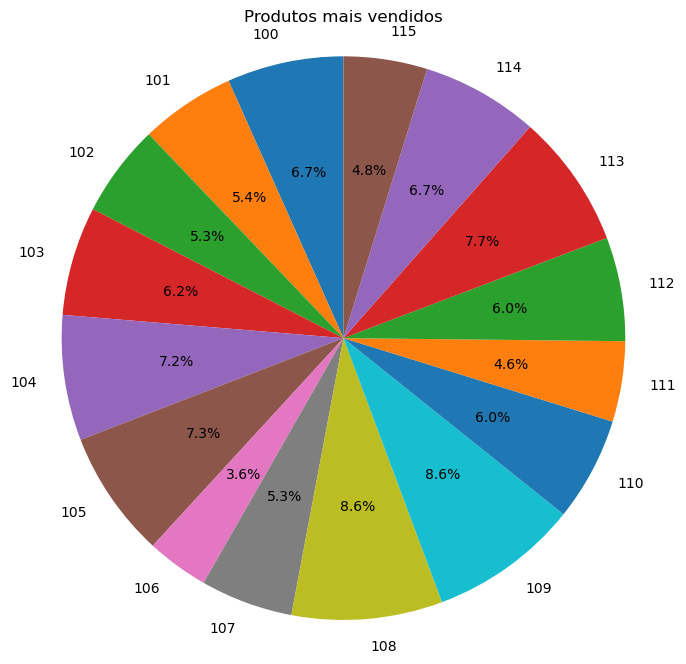

In [208]:
# Serão criados gráficos para a análise dos dados

import matplotlib.pyplot as plt 

produtos_mais_vendidos = dados.groupby('ID Produto')['Quantidade'].sum()

# Cria o gráfico
plt.figure(figsize=(8, 8))
plt.pie(produtos_mais_vendidos.values, labels=produtos_mais_vendidos.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Produtos mais vendidos')

plt.show()

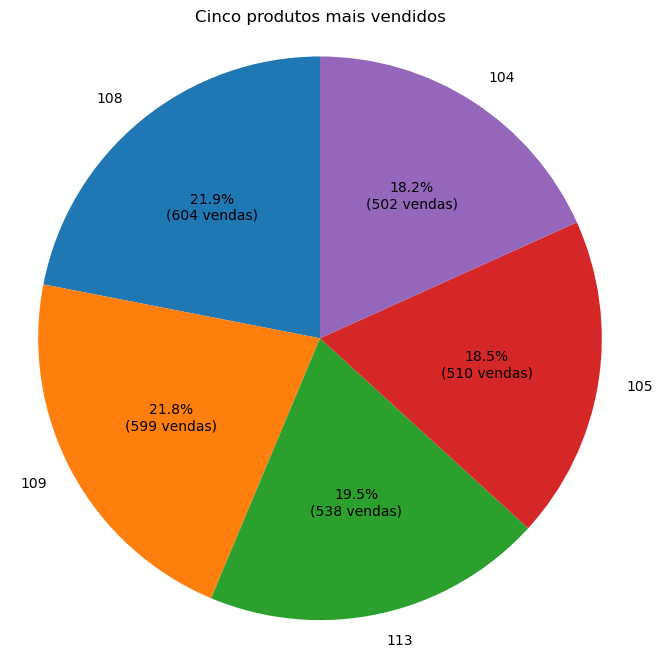

In [217]:
# Cria o gráfico com os cinco produtos mais vendidos
plt.figure(figsize=(8, 8))
plt.pie(cinco_mais_vendidos.values, labels=cinco_mais_vendidos.index, autopct=lambda p: f'{p:.1f}%\n({p * total_vendas.sum() / 100:.0f} vendas)', startangle=90)
plt.axis('equal')

plt.title('Cinco produtos mais vendidos')

plt.show()